# Congestive Heart Failure


#### Outline:
* [Blood Pressure Data](#bloodpressure)
* [System Codes Occurrences](#systemcodes) 


In [24]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from collections import defaultdict

# Settings
plt.figure(figsize=(12,6), facecolor='white')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['figure.facecolor'] = 'white'

<Figure size 864x432 with 0 Axes>

In [25]:
# Get patient data
raw_data = []
for file in glob.glob('../data/fhir/*'):
    raw_data.append(pd.read_json(file))

<a id="bloodpressure"></a>

### Blood Pressure Data

,Systolic,Diastolic
count,37.000000,37.000000
mean,116.729730,80.054054
std,6.813584,3.415211
min,105.000000,71.000000
25%,113.000000,78.000000
50%,116.000000,80.000000
75%,121.000000,82.000000
max,132.000000,89.000000


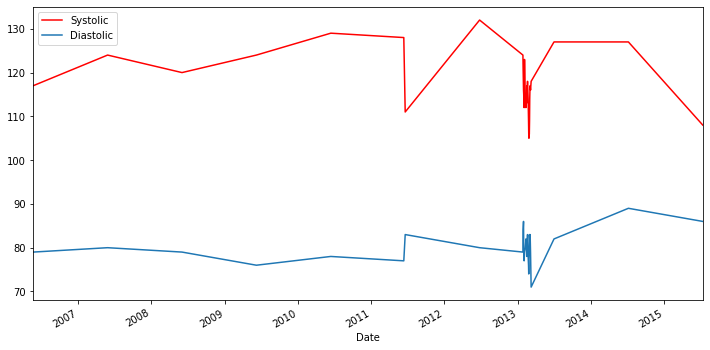

In [26]:
# Init
CONST_BLOOD_PRESSURE_CODE = '85354-9'

effective_date = []
diastolic_val = []
systolic_val = []

# Extract info from first patient
for i in range(raw_data[0]['entry'].count()):
    resource_type = raw_data[0]['entry'][i]['resource']['resourceType']
    if resource_type == "Observation":
        code = raw_data[0]['entry'][i]['resource']['code']['coding'][0]['code']
        if code == CONST_BLOOD_PRESSURE_CODE:
            diastolic_val.append(raw_data[0]['entry'][i]['resource']['component'][0]['valueQuantity']['value'])
            systolic_val.append(raw_data[0]['entry'][i]['resource']['component'][1]['valueQuantity']['value'])
            effective_date.append(raw_data[0]['entry'][i]['resource']['effectiveDateTime'])            

# Construct DataFrame
df = pd.DataFrame({'Date' : effective_date, 'Systolic' : systolic_val, 'Diastolic' : diastolic_val})
df['Date'] = pd.to_datetime(df['Date'])

# Display
df.plot(x='Date', y='Systolic', color='red', ax=plt.gca())
df.plot(x='Date', y='Diastolic', ax=plt.gca())
df.describe()

<a id="systemcodes"></a>

### System Code Occurrences

,urn:oid:2.16.840.1.113883.6.238,Frequency
0,2106-3,1
1,2186-5,1


,http://terminology.hl7.org/CodeSystem/v2-0203,Frequency
0,MR,1
1,SS,1
2,DL,1
3,PPN,1


,http://terminology.hl7.org/CodeSystem/v3-MaritalStatus,Frequency
0,M,1


,urn:ietf:bcp:47,Frequency
0,en-US,1


,http://terminology.hl7.org/CodeSystem/organization-type,Frequency
0,prov,3


,http://terminology.hl7.org/CodeSystem/v3-ActCode,Frequency
0,AMB,92
1,EMER,4
2,IMP,2


,http://snomed.info/sct,Frequency
0,162673000,212
1,448337001,78
2,88805009,40
3,185347001,20
4,303118004,14
5,399208008,12
6,430193006,12
7,266919005,11
8,185345009,10
9,434158009,9


,http://terminology.hl7.org/CodeSystem/condition-clinical,Frequency
0,active,5
1,resolved,5


,http://terminology.hl7.org/CodeSystem/condition-ver-status,Frequency
0,confirmed,10


,http://terminology.hl7.org/CodeSystem/goal-achievement,Frequency
0,in-progress,10
1,achieved,3


,http://terminology.hl7.org/CodeSystem/claim-type,Frequency
0,institutional,196
1,pharmacy,64


,http://terminology.hl7.org/CodeSystem/processpriority,Frequency
0,normal,162


,http://terminology.hl7.org/CodeSystem/claimcareteamrole,Frequency
0,primary,98


,http://terminology.hl7.org/CodeSystem/ex-diagnosistype,Frequency
0,principal,10


,https://bluebutton.cms.gov/resources/variables/line_cms_type_srvc_cd,Frequency
0,1,136


,http://terminology.hl7.org/CodeSystem/ex-serviceplace,Frequency
0,19,72
1,21,54
2,20,10


,http://terminology.hl7.org/CodeSystem/adjudication,Frequency
0,submitted,98


,http://www.nlm.nih.gov/research/umls/rxnorm,Frequency
0,746030,57
1,904419,1
2,857005,1
3,310965,1
4,313782,1
5,866414,1
6,313988,1
7,1719286,1


,http://terminology.hl7.org/CodeSystem/dose-rate-type,Frequency
0,ordered,60


,http://terminology.hl7.org/CodeSystem/observation-category,Frequency
0,laboratory,193
1,vital-signs,84
2,survey,11
3,imaging,3


,http://loinc.org,Frequency
0,85354-9,37
1,8462-4,37
2,8480-6,37
3,2339-0,16
4,6299-2,16
5,38483-4,16
6,49765-1,16
7,2947-0,16
8,6298-4,16
9,2069-3,16


,http://unitsofmeasure.org,Frequency
0,mg/dL,78
1,mm[Hg],74
2,mmol/L,64
3,%,21
4,cm,11
5,kg,11
6,kg/m2,11
7,{score},11
8,g/dL,8
9,fL,8


,http://hl7.org/fhir/sid/cvx,Frequency
0,140,30
1,33,3
2,133,3
3,113,3


,http://terminology.hl7.org/CodeSystem/v2-0074,Frequency
0,LAB,24


,http://terminology.hl7.org/CodeSystem/claiminformationcategory,Frequency
0,info,13


,https://bluebutton.cms.gov/resources/codesystem/adjudication,Frequency
0,https://bluebutton.cms.gov/resources/variables...,28
1,https://bluebutton.cms.gov/resources/variables...,28
2,https://bluebutton.cms.gov/resources/variables...,28
3,https://bluebutton.cms.gov/resources/variables...,28
4,https://bluebutton.cms.gov/resources/variables...,28
5,https://bluebutton.cms.gov/resources/variables...,28


,http://dicom.nema.org/resources/ontology/DCM,Frequency
0,US,5
1,DX,3
2,CR,2


,urn:ietf:rfc:3986,Frequency
0,1.2.840.10008.5.1.4.1.1.1.1,5
1,1.2.840.10008.5.1.4.1.1.3.1,5


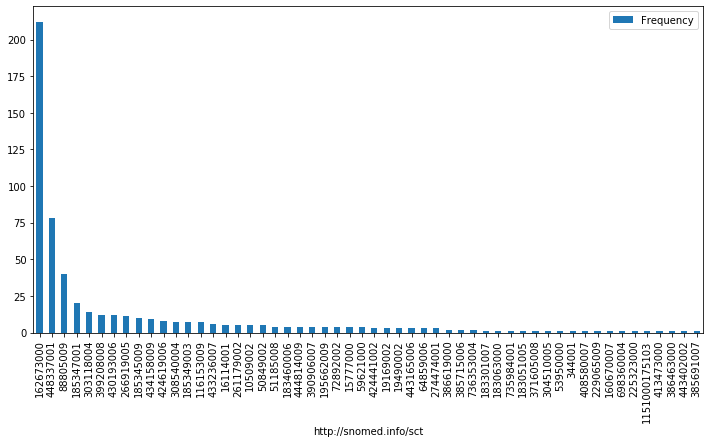

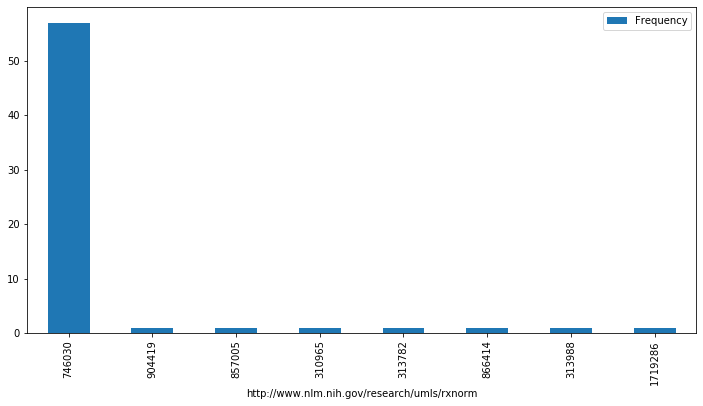

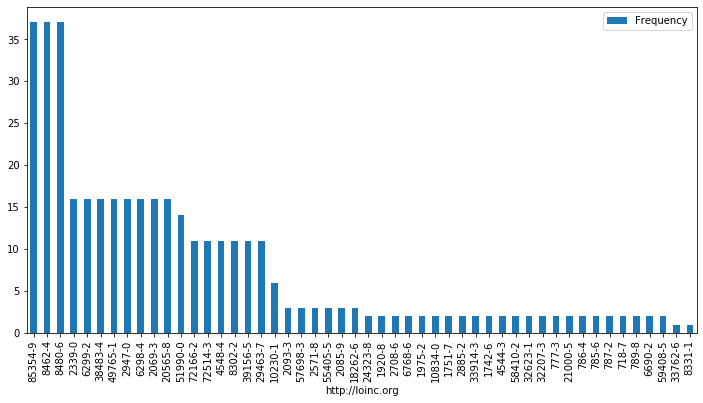

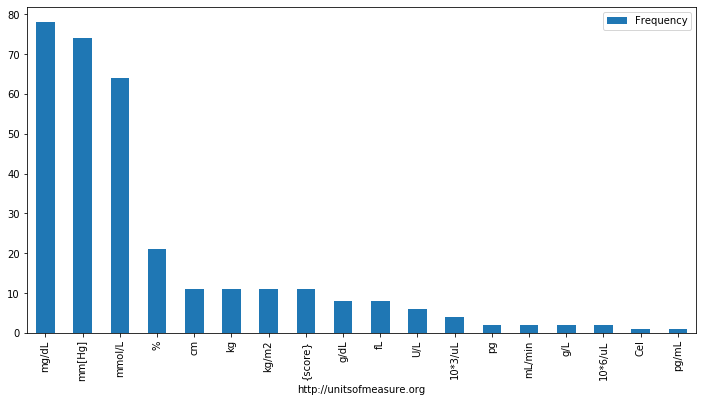

In [27]:
# Gets all 'code' occurrences and the 'system' it belongs to
# Returns a 2D dictionary
def recursive_search(patient_data, system=None, dict_counter=None):
    if dict_counter is None:
        dict_counter = defaultdict(Counter)
    for key, value in patient_data.items():
        if key == 'system':
            system = value
        elif key == 'code' and not(isinstance(value, dict)):
            dict_counter[system][value] += 1
        elif isinstance(value, dict):
            recursive_search(value, system, dict_counter)
        elif isinstance(value, list):
            for x in value:
                if isinstance(x, dict):
                    recursive_search(x, system, dict_counter)
    return dict_counter

result = recursive_search(raw_data[0]['entry'])

# Construct DataFrames
df = []
for sys_key, sys_dict in result.items():
    df.append(
        pd.DataFrame.from_dict(sys_dict, orient='index')
        .sort_values(by=[0], ascending=False).reset_index()
        .rename(columns={'index':sys_key, 0 : 'Frequency'})
    )

# Display
for frame in df:
    display(frame)
    if len(frame.index) > 6: # ignore small DataFrames for plotting
        frame.plot.bar(x=frame.columns[0])
